# The Settlers of Catan Scoring

In [1]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [88]:
raw_scores = pd.read_excel('catan-6.xlsx', parse_dates=[0])

In [89]:
raw_scores

,Oyun No,Tarih,Asıl oyuncu,Sıra,Yedek oyuncu,Kazanan,Puan,Renk,Şehir Sayısı,Köy Sayısı,...,İlk 2-1 Koyun Liman,İlk 2-1 Odun Liman,İlk 3-1 Liman,2-1 Tuğla,2-1 Saman,2022-03-01 00:00:00,2-1 Odun,2-1 Kaya,2-1 Koyun,Zar
0,1.0,2022-02-22,Batuhan,1.0,NaN,Alperen,7.0,Mavi,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2022-02-22,Alperen,2.0,NaN,Alperen,10.0,Beyaz,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2022-02-22,Volkan,4.0,Çağatay,Alperen,8.0,Kırmızı,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2022-02-22,Melis,3.0,Ecem,Alperen,7.0,Turuncu,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,2022-03-06,Alperen,2.0,NaN,Çağatay,5.0,Beyaz,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,31.0,2022-05-09,Batuhan,2.0,NaN,Ecem,5.0,Mavi,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"3, 4, 8, 5, 6, 9"
123,31.0,2022-05-09,Canberk,3.0,NaN,Ecem,7.0,Turuncu,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"3, 11, 10, 5, 4, 8"
124,32.0,2022-05-12,Batuhan,1.0,NaN,Batuhan,10.0,Mavi,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"5, 6, 9, 3, 8, 4"
125,32.0,2022-05-12,Ecem,2.0,NaN,Batuhan,9.0,Kırmızı,2.0,4.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,"5, 8, 10, 4, 11, 5"


In [90]:
raw_scores["player_count"] = raw_scores.groupby("Oyun No")["Sıra"].transform('max')
raw_scores["avg_time_per_player"] = raw_scores["Süre"] / raw_scores["player_count"]

In [91]:
time_col = "Süre"
volkan = raw_scores.loc[(raw_scores["Asıl oyuncu"] == "Volkan") | (raw_scores["Yedek oyuncu"] == "Volkan")]["Oyun No"].unique()
avg_volkan_time = (raw_scores.loc[raw_scores["Oyun No"].isin(volkan)].groupby("Oyun No")[time_col].max().sum()/60)\
      /(raw_scores.loc[raw_scores["Oyun No"].isin(volkan)]["Oyun No"].nunique())
avg_wo_volkan_time = (raw_scores.loc[~raw_scores["Oyun No"].isin(volkan)].groupby("Oyun No")[time_col].max().sum()/60) \
      /(raw_scores.loc[~raw_scores["Oyun No"].isin(volkan)]["Oyun No"].nunique())

extension = raw_scores.loc[raw_scores["Extension"] == 1]["Oyun No"].unique()
avg_extension_time = (raw_scores.loc[raw_scores["Oyun No"].isin(extension)].groupby("Oyun No")[time_col].max().sum()/60) \
      /(raw_scores.loc[raw_scores["Oyun No"].isin(extension)]["Oyun No"].nunique())
avg_regular_time = (raw_scores.loc[~raw_scores["Oyun No"].isin(extension)].groupby("Oyun No")[time_col].max().sum()/60) \
      /(raw_scores.loc[~raw_scores["Oyun No"].isin(extension)]["Oyun No"].nunique())

In [92]:
time_col = "avg_time_per_player"
volkan = raw_scores.loc[(raw_scores["Asıl oyuncu"] == "Volkan") | (raw_scores["Yedek oyuncu"] == "Volkan")]["Oyun No"].unique()
avg_volkan_time_per_player = (raw_scores.loc[raw_scores["Oyun No"].isin(volkan)].groupby("Oyun No")[time_col].max().sum()/60)\
      /(raw_scores.loc[raw_scores["Oyun No"].isin(volkan)]["Oyun No"].nunique())
avg_wo_volkan_time_per_player = (raw_scores.loc[~raw_scores["Oyun No"].isin(volkan)].groupby("Oyun No")[time_col].max().sum()/60) \
      /(raw_scores.loc[~raw_scores["Oyun No"].isin(volkan)]["Oyun No"].nunique())

extension = raw_scores.loc[raw_scores["Extension"] == 1]["Oyun No"].unique()
avg_extension_time_per_player = (raw_scores.loc[raw_scores["Oyun No"].isin(extension)].groupby("Oyun No")[time_col].max().sum()/60) \
      /(raw_scores.loc[raw_scores["Oyun No"].isin(extension)]["Oyun No"].nunique())
avg_regular_time_per_player = (raw_scores.loc[~raw_scores["Oyun No"].isin(extension)].groupby("Oyun No")[time_col].max().sum()/60) \
      /(raw_scores.loc[~raw_scores["Oyun No"].isin(extension)]["Oyun No"].nunique())

### Player Count vs Time passed during Game

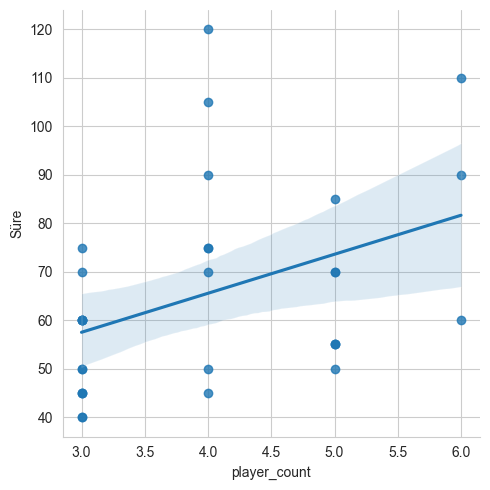

In [93]:
times = pd.merge(raw_scores.groupby("Oyun No", as_index=False).agg({"Süre": 'max'}),
         raw_scores.groupby("Oyun No", as_index=False).agg({"player_count": 'max'}), on="Oyun No")
sns.set_style('whitegrid')
sns.lmplot(x ='player_count', y ='Süre', data = times)

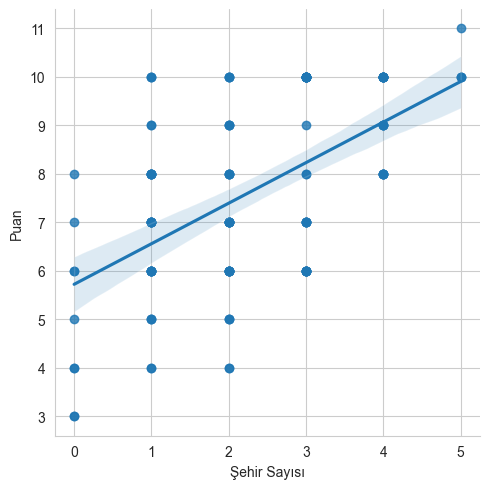

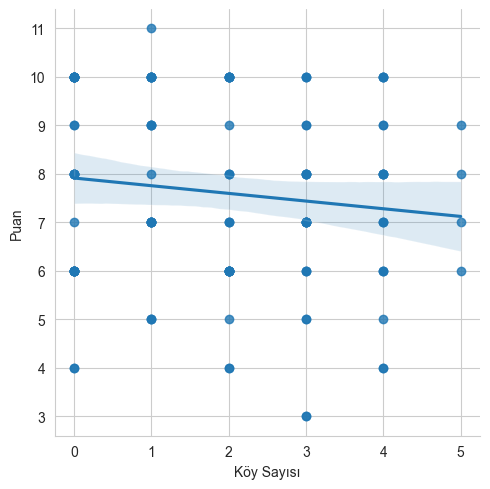

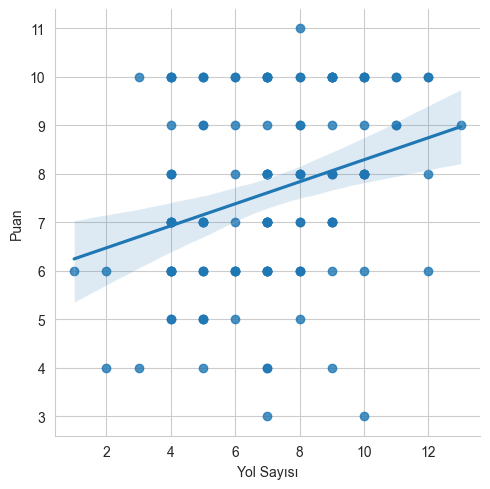

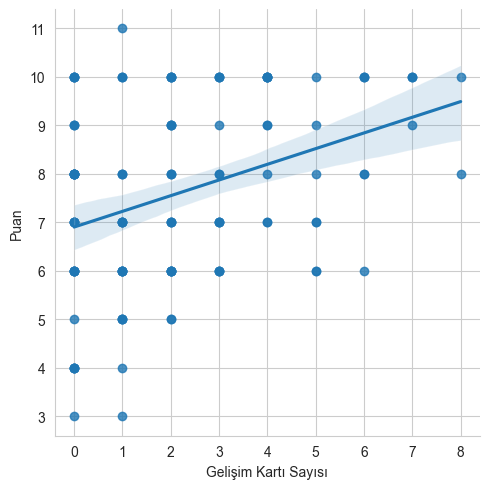

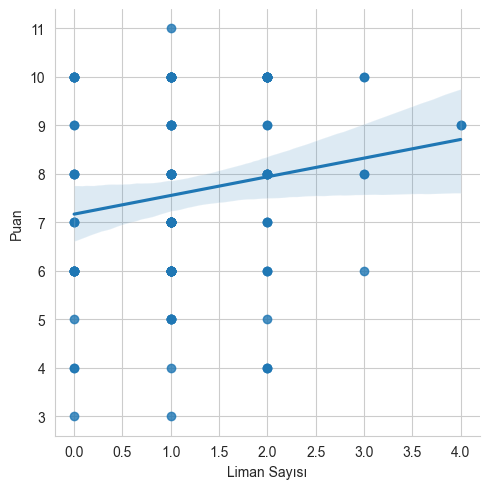

In [102]:
sns.set_style('whitegrid')
sns.lmplot(x ='Şehir Sayısı', y ='Puan', data = raw_scores)

sns.lmplot(x ='Köy Sayısı', y ='Puan', data = raw_scores)

sns.lmplot(x ='Yol Sayısı', y ='Puan', data = raw_scores)

sns.lmplot(x ='Gelişim Kartı Sayısı', y ='Puan', data = raw_scores)

sns.lmplot(x ='Liman Sayısı', y ='Puan', data = raw_scores)

### Time passed per player during game as the # of game increases

<AxesSubplot:xlabel='Oyun No', ylabel='rolling_mean'>

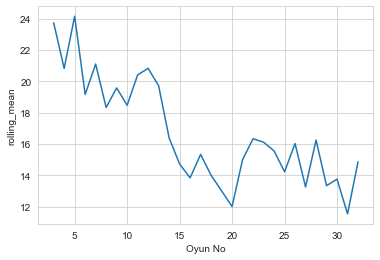

In [8]:
times["time_per_player"] = times["Süre"]/times["player_count"]
times["rolling_mean"] = times["time_per_player"].rolling(3).mean()
sns.lineplot(x="Oyun No", y="rolling_mean", data=times)

In [9]:
total_time = raw_scores.groupby("Oyun No")["Süre"].max().sum()/60
avg_time = total_time/raw_scores["Oyun No"].max()
extension_percent = raw_scores.groupby("Oyun No")["Extension"].max().sum()/raw_scores["Oyun No"].max()
shortest = raw_scores["Süre"].min()
longest = raw_scores["Süre"].max()
print(f"""
Total Hours Played: {total_time}\n
Avg hour per game: {round(avg_time, 4)}\n
Extension Games %: {round(100*extension_percent, 2)}\n
Avg Extension Time: {round(avg_extension_time, 4)}\n
Avg Regular Time: {round(avg_regular_time, 4)}\n
Avg Time w/Volkan: {round(avg_volkan_time, 4)}\n
Avg Time wo/Volkan: {round(avg_wo_volkan_time, 4)}\n
Avg Extension Time per Player: {round(avg_extension_time_per_player, 4)}\n
Avg Regular Time per Player: {round(avg_regular_time_per_player, 4)}\n
Avg Time w/Volkan per Player: {round(avg_volkan_time_per_player, 4)}\n
Avg Time wo/Volkan per Player: {round(avg_wo_volkan_time_per_player, 4)}\n
Shortest Game: {round(shortest/60, 4)}
Longest Game: {round(longest/60, 4)}
""")


Total Hours Played: 34.833333333333336

Avg hour per game: 1.0885

Extension Games %: 31.25

Avg Extension Time: 1.1667

Avg Regular Time: 1.053

Avg Time w/Volkan: 1.4583

Avg Time wo/Volkan: 1.0357

Avg Extension Time per Player: 0.2189

Avg Regular Time per Player: 0.3112

Avg Time w/Volkan per Player: 0.3056

Avg Time wo/Volkan per Player: 0.2791

Shortest Game: 0.6667
Longest Game: 2.0



In [11]:
yedek = raw_scores.loc[~raw_scores["Yedek oyuncu"].isnull()]

In [12]:
yedek["Asıl oyuncu"] = yedek["Yedek oyuncu"]

In [13]:
yedek

,Oyun No,Tarih,Asıl oyuncu,Sıra,Yedek oyuncu,Kazanan,Puan,Renk,Şehir Sayısı,Köy Sayısı,...,İlk 3-1 Liman,2-1 Tuğla,2-1 Saman,2022-03-01 00:00:00,2-1 Odun,2-1 Kaya,2-1 Koyun,Zar,player_count,avg_time_per_player
2,1.0,2022-02-22,Çağatay,4.0,Çağatay,Alperen,8.0,Kırmızı,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,26.250000
3,1.0,2022-02-22,Ecem,3.0,Ecem,Alperen,7.0,Turuncu,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,26.250000
7,3.0,2022-03-08,Feyza,4.0,Feyza,Melis,6.0,Kırmızı,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,30.000000
14,4.0,2022-03-09,Feyza,4.0,Feyza,Batuhan,4.0,Beyaz,2.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,17.500000
88,24.0,2022-04-01,Feyza,2.0,Feyza,Ecem,8.0,Beyaz,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,6.0,18.333333


In [14]:
raw_scores = raw_scores[["Oyun No", "Sıra", "Tarih", "Asıl oyuncu", "Kazanan", "Puan"]]
yedek = yedek[["Oyun No", "Sıra", "Tarih", "Asıl oyuncu", "Kazanan", "Puan"]]

raw_scores = pd.concat([raw_scores, yedek], axis=0)

In [15]:
raw_scores.columns = ["game_id", "rank", "date", "player", "winner", "score"]

In [16]:
raw_scores

,game_id,rank,date,player,winner,score
0,1.0,1.0,2022-02-22,Batuhan,Alperen,7.0
1,1.0,2.0,2022-02-22,Alperen,Alperen,10.0
2,1.0,4.0,2022-02-22,Volkan,Alperen,8.0
3,1.0,3.0,2022-02-22,Melis,Alperen,7.0
4,2.0,2.0,2022-03-06,Alperen,Çağatay,5.0
...,...,...,...,...,...,...
2,1.0,4.0,2022-02-22,Çağatay,Alperen,8.0
3,1.0,3.0,2022-02-22,Ecem,Alperen,7.0
7,3.0,4.0,2022-03-08,Feyza,Melis,6.0
14,4.0,4.0,2022-03-09,Feyza,Batuhan,4.0


In [17]:
def win_or_lose(player: str, winner: str):
    if player == winner:
        return 'W'
    else:
        return 'L'

In [80]:
raw_scores["result"] = "L"
raw_scores.loc[raw_scores["player"] == raw_scores["winner"], "result"] = "W"
scores = copy.deepcopy(raw_scores)

### Probability of winning a game given that your turn is the last.

In [81]:
scores["max_rank"] = raw_scores.groupby("game_id")["rank"].transform('max')
scores["min_rank"] = raw_scores.groupby("game_id")["rank"].transform('min')

In [83]:
scores["is_last_player"] = np.where(scores["max_rank"] == scores["rank"], 1, 0)
scores["is_first_player"] = np.where(scores["min_rank"] == scores["rank"], 1, 0)
scores["winner"] = np.where(scores["result"] == "W", 1, 0)
scores['count'] = 1

In [84]:
last = pd.pivot_table(
    scores, 
    values='count', 
    index=['winner'], 
    columns=['is_last_player'], 
    aggfunc=np.size, 
    fill_value=0
)

first = pd.pivot_table(
    scores, 
    values='count', 
    index=['winner'], 
    columns=['is_first_player'], 
    aggfunc=np.size, 
    fill_value=0
)

- P(A) is the probability of a player wins. 
- P(B) is the probability of being last player.
- P(A|B) is the probability of winning the game, given that the player's turn is the last

P(A|B) = P(A ∩ B) / P(B)


- P(A) is the probability of a player wins. 
- P(B) is the probability of being first player.
- P(A|B) is the probability of winning the game, given that the player's turn is the first

P(A|B) = P(A ∩ B) / P(B)

In [86]:
PB = sum(last.iloc[:,1])/sum(sum(last.values))
PANB = last.iloc[1,1]/sum(sum(last.values))

print(f"Probability of winning the game, given that the player's turn is the last {round(PANB/PB, 2)}")

PB = sum(first.iloc[:,1])/sum(sum(first.values))
PANB = first.iloc[1,1]/sum(sum(first.values))

print(f"Probability of winning the game, given that the player's turn is the last {round(PANB/PB, 2)}")

Probability of winning the game, given that the player's turn is the last 0.26
Probability of winning the game, given that the player's turn is the last 0.22


### Win/Loss Streaks
Graph the win/loss streaks for each player

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
scores = scores.sort_values("date")
scores.loc[scores['result'] == "W", "wins"] = 1
scores.loc[scores['result'] == "L", "losses"] = -1

In [37]:
def plot_win_lose_streaks(player):
    fig, ax = plt.subplots(figsize=(10,1))
    # add a horizontal line at y=0
    plt.axhline(y=0, color='black', linewidth=3)
    
    # separate wins, draws and losses for so we can show them in different colors
    scores[scores['player']==player]['wins'].plot.bar(ax=ax, color='green', width=1)
    scores[scores['player']==player]['losses'].plot.bar(ax=ax, color='red', width=1)
    
    plt.title(player, loc='left')

    ax.tick_params(bottom=False, labelbottom=False)
    plt.gca().invert_xaxis()

    plt.show()

In [39]:
players = scores.drop_duplicates('player')['player']
def wins_in_every_x_game(player, df):
    data = df[(df['player']==player)]
    data.fillna({"wins": 0}, inplace=True)
    data["game_id"] = data["count"].cumsum()
    data["previous_status"] = data["wins"].shift(1)
    data["previous_game"] = data["game_id"].shift(1)
    data.loc[data["previous_status"] == 1, "last_win_game"] = data.loc[data["previous_status"] == 1, "previous_game"]
    data = data.loc[~data["last_win_game"].isnull()]
    data["previous_last_win_game"] = data["last_win_game"].shift(1)
    data["diff"] = data["last_win_game"] - data["previous_last_win_game"]
    data.fillna({"diff": data.last_win_game}, inplace=True)
    data["game_id"] = data["count"].cumsum()
    return data[["game_id", "player", "diff"]]
winning = pd.DataFrame()
for player in players:
    data = wins_in_every_x_game(player, df=scores)
    winning = pd.concat([winning, data], axis=0)
    mean_ = round(np.mean(data["diff"]),2)
    print(f"{player} Wins in Every {mean_ if mean_ > 0 else 0} game")
winning = winning.reset_index(drop=True)
winning["rolling_mean"] = winning.groupby("player")["diff"].apply(lambda x: x.rolling(2).mean())

Batuhan Wins in Every 5.2 game
Alperen Wins in Every 2.0 game
Volkan Wins in Every 0 game
Melis Wins in Every 6.5 game
Ecem Wins in Every 3.83 game
Çağatay Wins in Every 4.67 game
Feyza Wins in Every 3.0 game
Canberk Wins in Every 0 game


<AxesSubplot:xlabel='game_id', ylabel='rolling_mean'>

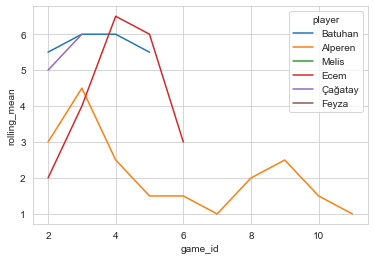

In [40]:
sns.lineplot(x="game_id", y="rolling_mean", hue="player", data=winning)

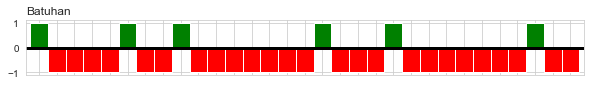

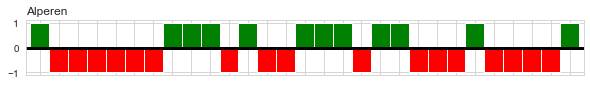

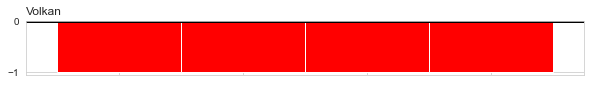

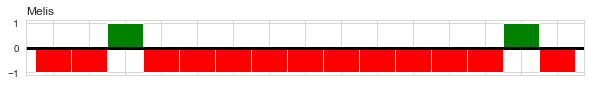

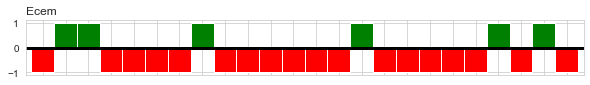

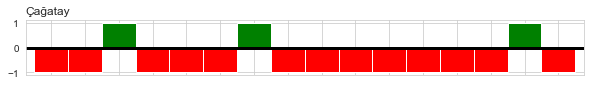

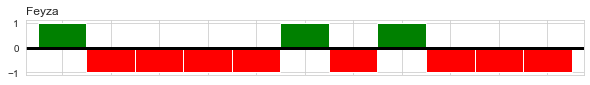

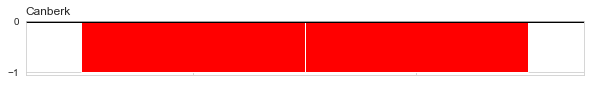

In [41]:
for player in players:
    plot_win_lose_streaks(player)

## Rankings

Show and rank via win percentage for each player. Alternatives would be
 - total number of wins
 - total IMPs scored
 
but go with win percentages for now

In [42]:
rankings = scores.groupby('player').count().drop(['score'], axis=1)
# drop players with 3 games or less
rankings = rankings[rankings['result'] >= 3]
rankings['pct'] = rankings['wins'] / rankings['result']
rankings = rankings.sort_values(by='pct', ascending=False)

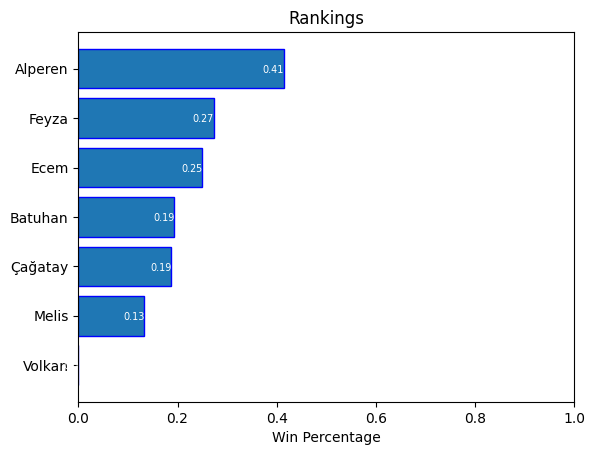

In [43]:
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(rankings))
ax.barh(y_pos, rankings['pct'], edgecolor='blue')
ax.set_yticks(y_pos, labels=list(rankings.index))
ax.invert_yaxis()  # highest first
ax.set_xlabel('Win Percentage')
ax.set_title('Rankings')

for i in range(len(rankings.index)):
    plt.text(rankings['pct'][i], y_pos[i], round(rankings['pct'][i],2), 
             ha='right', va='center_baseline', fontsize='x-small', color='white')

ax.set_xlim((0, 1))
plt.show()

## Confidence Intervals

In probability theory and statistics, the binomial distribution with parameters n and p is the discrete probability distribution of the number of successes in a sequence of n independent experiments, each asking a yes–no question, and each with its own Boolean-valued outcome: success (with probability p) or failure (with probability q = 1 − p).

Calculate the confidence interval for the win percentages above, i.e. the *correct* win percentage for each player lies somewhere in the interval calculated with a high probability.

In [44]:
from scipy.stats import binomtest

In [45]:
intervals = {}
for i in range(len(rankings.index)):
    result = binomtest(int(rankings.iloc[i]['wins']), int(rankings.iloc[i]['result']), rankings.iloc[i]['pct'], alternative='two-sided')
    intervals[rankings.index[i]] = result.proportion_ci(confidence_level=0.95)

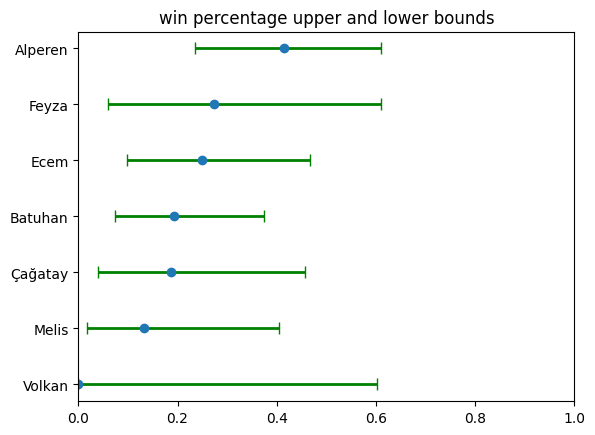

In [46]:
fig, ax = plt.subplots()
x = list()
y = list()
error_range = list()

# reverse for descending order
for i in range(len(intervals.keys())-1,-1, -1):
    # player, center, lower_limit, upper_limit
    # ('izzet', 0.6818181818181818, 0.451275572426236, 0.8613534784462099)
    lines = rankings.index[i], rankings['pct'][rankings.index[i]], intervals[rankings.index[i]][0], intervals[rankings.index[i]][1]
    x.append(lines[1])
    y.append(lines[0])
    error_range.append([lines[1]-lines[2], lines[3]-lines[1]])

ax.errorbar(x, y, xerr=np.array(error_range).T, fmt='o', ecolor='green', elinewidth=2, capsize=4)

# tidy up the figure
ax.set_xlim((0, 1))
ax.set_title('win percentage upper and lower bounds')
plt.show()

That makes sense. Cuneyt played less games than Izzet and hence his upper limit for his *true* percentage is higher.

However, let's not give too much importance to these confidence intervals as the underlying distribution shifts in time - we are improving our bridge playing skills presumably at different rates.  Still, confidence intervals are a nice reminder that the point win percentages are not the be-all and end-all in rankings, especially since the number of games played (n) is still too few in number.

## Rankings - Cont

Another ranking method is to use points for each game: 1 points for a win, 0 points for a loss.

In [47]:
raw_scores["points"] = 0
raw_scores.loc[raw_scores["player"] == raw_scores["winner"], "points"] = 1
scores = copy.deepcopy(raw_scores)

In [48]:
scores

,game_id,rank,date,player,winner,score,result,points
0,1.0,1.0,2022-02-22,Batuhan,Alperen,7.0,L,0
1,1.0,2.0,2022-02-22,Alperen,Alperen,10.0,W,1
2,1.0,4.0,2022-02-22,Volkan,Alperen,8.0,L,0
3,1.0,3.0,2022-02-22,Melis,Alperen,7.0,L,0
4,2.0,2.0,2022-03-06,Alperen,Çağatay,5.0,L,0
...,...,...,...,...,...,...,...,...
2,1.0,4.0,2022-02-22,Çağatay,Alperen,8.0,L,0
3,1.0,3.0,2022-02-22,Ecem,Alperen,7.0,L,0
7,3.0,4.0,2022-03-08,Feyza,Melis,6.0,L,0
14,4.0,4.0,2022-03-09,Feyza,Batuhan,4.0,L,0


add up the points earned to form a league table

In [49]:
league = pd.DataFrame()
league['points_total'] = scores.groupby(by="player")['points'].sum()
league['games_played'] = scores.groupby(by="player")['points'].count()
league['scores'] = scores.groupby(by="player")['score'].sum()
league['points_per_game'] = league['scores'] / league['games_played']
league['win_perc'] = league['points_total'] / league['games_played']
league.sort_values(by=['win_perc'], ascending=False, inplace=True)

league

,points_total,games_played,scores,points_per_game,win_perc
player,,,,,
Alperen,12,29,241.0,8.310345,0.413793
Feyza,3,11,79.0,7.181818,0.272727
Ecem,6,24,189.0,7.875000,0.250000
Batuhan,6,31,213.0,6.870968,0.193548
Çağatay,3,16,120.0,7.500000,0.187500
Melis,2,15,114.0,7.600000,0.133333
Canberk,0,2,13.0,6.500000,0.000000
Volkan,0,4,30.0,7.500000,0.000000


### Condorcet Method

In [50]:
def find_ranks_in_game(data: pd.DataFrame, score_col: str) -> pd.DataFrame:
    data["rank_in_game"] = data.groupby("game_id")[score_col].rank("dense", ascending=False)
    return data

In [51]:
scores = find_ranks_in_game(data=scores, score_col="score") 

In [52]:
import condorcet

In [53]:
candidates = list(scores.player.unique())
print(f"Candidates are: {candidates}")
votes = []
temp = scores[["game_id", "player", "rank_in_game"]]
for game in scores.game_id.unique():
    _temp = temp.loc[temp["game_id"] == game]
    for player_ in scores.player.unique():
        if player_ not in _temp.player.unique():
            _temp = _temp.append({'game_id': game, 
                            'player': player_, 'rank_in_game': 7}, ignore_index = True)
    _temp = _temp.set_index("player")
    votes.append(_temp.drop("game_id", axis=1).to_dict()["rank_in_game"])
evaluator = condorcet.CondorcetEvaluator(candidates=candidates, votes=votes)
winners, rest_of_table = evaluator.get_n_winners(1)
print(f"Winner is: {winners}")

Candidates are: ['Batuhan', 'Alperen', 'Volkan', 'Melis', 'Feyza', 'Çağatay', 'Ecem', 'Canberk']
Winner is: ['Alperen']


### Most occurence by rank in game

In [54]:
data = scores[["player", "rank_in_game"]]
temp_ = {}
delete_users = []
for rank_ in data.sort_values("rank_in_game").rank_in_game.unique():
    temp = data.loc[(data["rank_in_game"] == rank_) & (~data["player"].isin(delete_users))]
    temp["count"] = 1
    temp = temp.groupby(["player", "rank_in_game"]).sum().reset_index()
    if len(temp) > 0:
        delete_user = list(temp.iloc[temp.groupby("rank_in_game")["count"].idxmax().values].player)[0]
        delete_users.append(delete_user)
        temp_[delete_user] = rank_
print(temp_)

{'Alperen': 1.0, 'Ecem': 2.0, 'Batuhan': 3.0, 'Çağatay': 4.0}
